In [5]:
#Ejecutar en terminal: pip install -r requirements.txt

import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Set the path to the file you'd like to load
file_path = "./Student_Performance.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "nikhil7280/student-performance-multiple-linear-regression",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

c:\Users\josep\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


First 5 records:    Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [6]:
# Información del DataFrame, se imprime cantidad de filas, columnas y tipos de datos 
print("================================= Información del Dataframe(filas,columnas, tipos de datos) ==============================")
print(df.info())

print("\n")


================================= Información del Dataframe(filas,columnas, tipos de datos) ==============================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None




---
### Analisis de caracteristicas 

Se busca hacer un Analisis exploratorio de los datos buscando outliers, para esto necesitamos conocer 


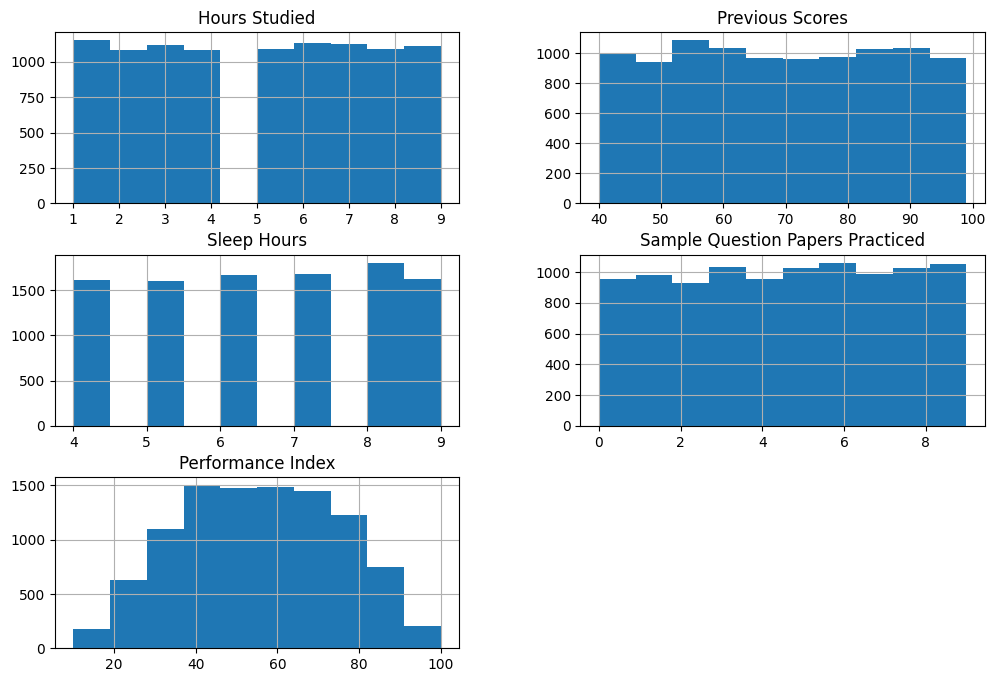

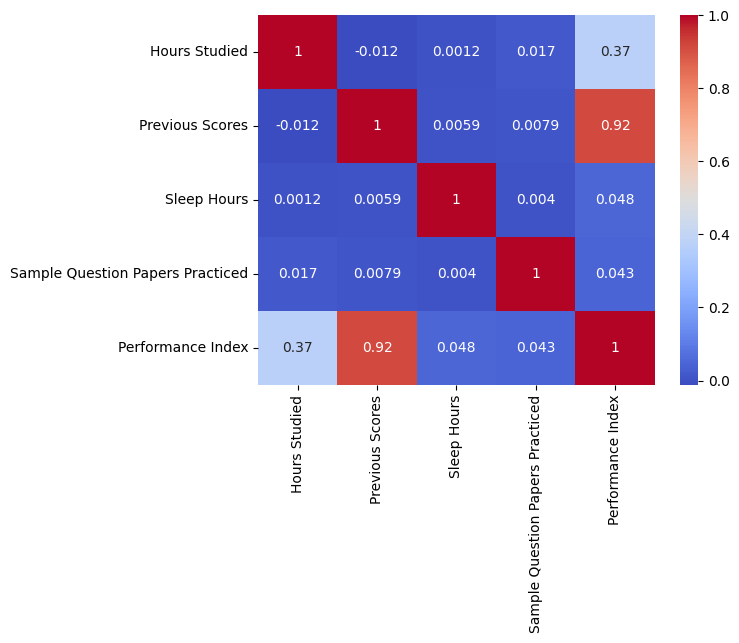

In [11]:
# Histograma de cada variable
df.hist(figsize=(12,8))
plt.show()

# Mapa de calor de correlaciones

corr = df.select_dtypes(include=["number"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

## Carga y chequeos iniciales

In [5]:
# Mostrar la forma del DataFrame (filas, columnas)
print("Forma del DataFrame (filas, columnas):", df.shape)

# Mostrar los tipos de datos de cada columna
print("\nTipos de datos de cada columna:")
print(df.dtypes)

# Mostrar las primeras 10 filas del DataFrame
print("\nPrimeras 10 filas del DataFrame:")
print(df.head(10))

# Revisar memoria y tipos de datos para detectar posibles errores de lectura
print("\n================================= Información del DataFrame (memoria, tipos de datos) ==============================")
df.info()

# Guardar una copia de trabajo del DataFrame original
df_original = df.copy()

Forma del DataFrame (filas, columnas): (10000, 6)

Tipos de datos de cada columna:
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

Primeras 10 filas del DataFrame:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   
5              3               78                         No            9   
6              7               73                        Yes      

## Valores faltantes y duplicados

In [9]:
# --- Valores faltantes y duplicados ---

# Conteo de valores faltantes por columna
print("Valores faltantes por columna:")
print(df.isna().sum())

# Porcentaje de valores faltantes por columna
print("\nPorcentaje de valores faltantes por columna:")
print(df.isna().mean() * 100)



# Conteo de filas duplicadas completas
print("\nFilas duplicadas (todas las columnas):", df.duplicated().sum())




Valores faltantes por columna:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Porcentaje de valores faltantes por columna:
Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64

Filas duplicadas (todas las columnas): 127


*No hay valores faltantes*

## Análisis univariado (cada variable por separado)


===== Análisis univariado: Hours Studied =====
Estadísticos básicos:
count    10000.000000
mean         4.992900
std          2.589309
min          1.000000
10%          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
90%          9.000000
max          9.000000
Name: Hours Studied, dtype: float64
Media: 4.993
Mediana: 5.000
Desviación estándar: 2.589
Asimetría (skew): -0.004
Curtosis: -1.232


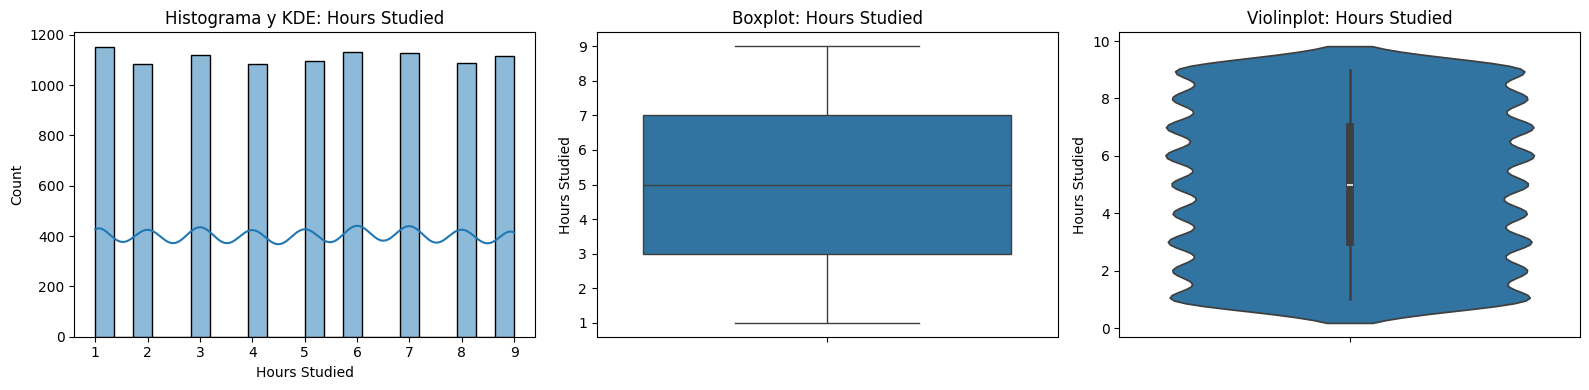


===== Análisis univariado: Previous Scores =====
Estadísticos básicos:
count    10000.000000
mean        69.445700
std         17.343152
min         40.000000
10%         45.000000
25%         54.000000
50%         69.000000
75%         85.000000
90%         93.000000
max         99.000000
Name: Previous Scores, dtype: float64
Media: 69.446
Mediana: 69.000
Desviación estándar: 17.343
Asimetría (skew): 0.005
Curtosis: -1.213


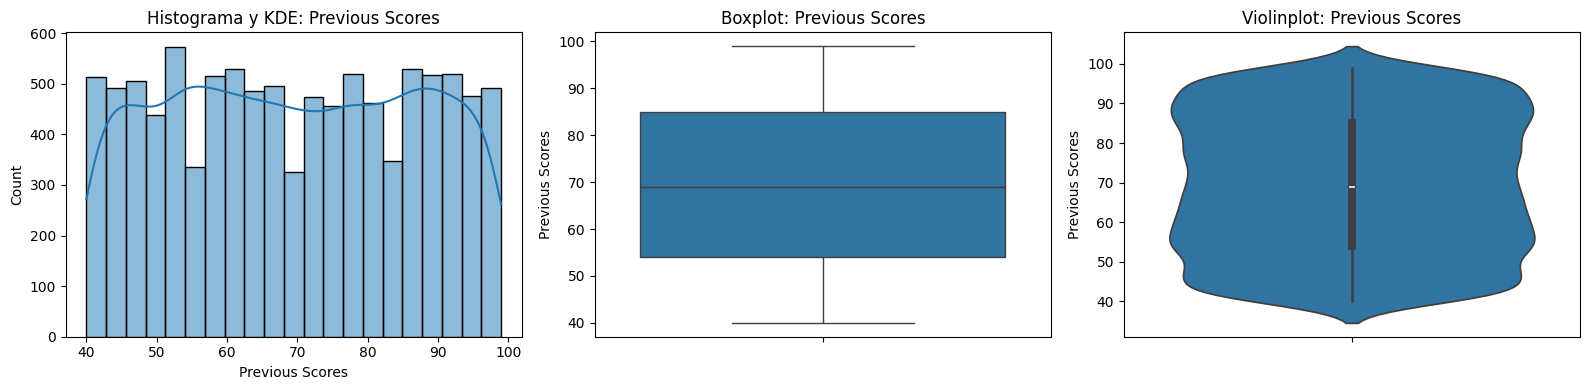


===== Análisis univariado: Sleep Hours =====
Estadísticos básicos:
count    10000.000000
mean         6.530600
std          1.695863
min          4.000000
10%          4.000000
25%          5.000000
50%          7.000000
75%          8.000000
90%          9.000000
max          9.000000
Name: Sleep Hours, dtype: float64
Media: 6.531
Mediana: 7.000
Desviación estándar: 1.696
Asimetría (skew): -0.039
Curtosis: -1.257


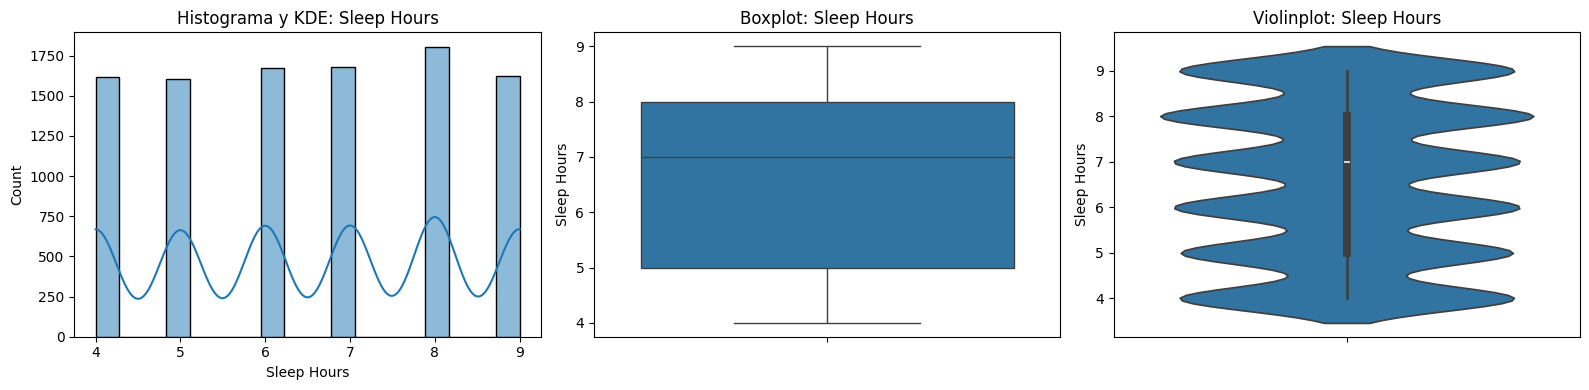


===== Análisis univariado: Sample Question Papers Practiced =====
Estadísticos básicos:
count    10000.000000
mean         4.583300
std          2.867348
min          0.000000
10%          1.000000
25%          2.000000
50%          5.000000
75%          7.000000
90%          9.000000
max          9.000000
Name: Sample Question Papers Practiced, dtype: float64
Media: 4.583
Mediana: 5.000
Desviación estándar: 2.867
Asimetría (skew): -0.036
Curtosis: -1.215


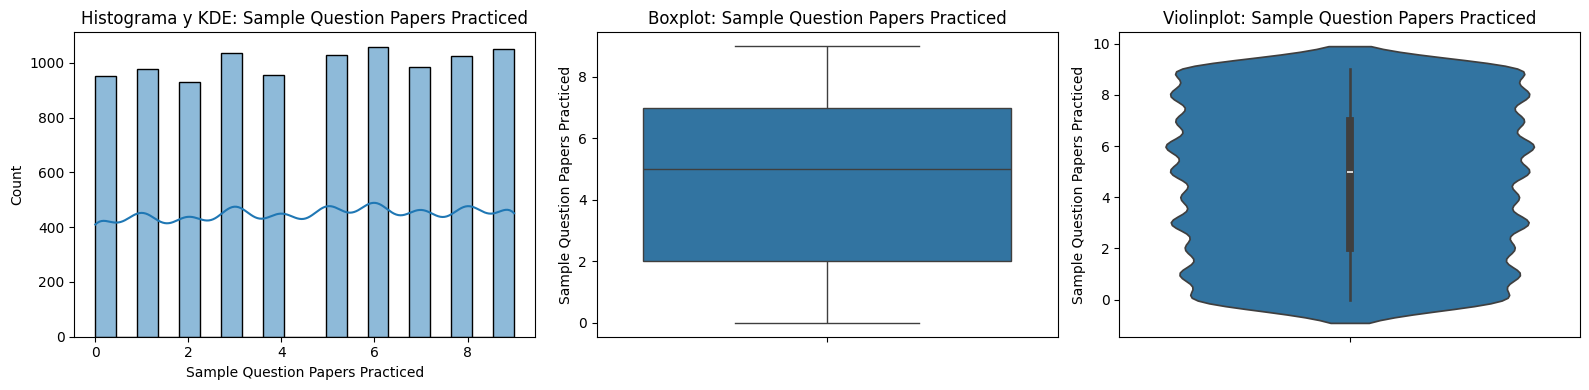


===== Análisis univariado: Performance Index =====
Estadísticos básicos:
count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
10%         29.000000
25%         40.000000
50%         55.000000
75%         71.000000
90%         81.000000
max        100.000000
Name: Performance Index, dtype: float64
Media: 55.225
Mediana: 55.000
Desviación estándar: 19.213
Asimetría (skew): -0.002
Curtosis: -0.861


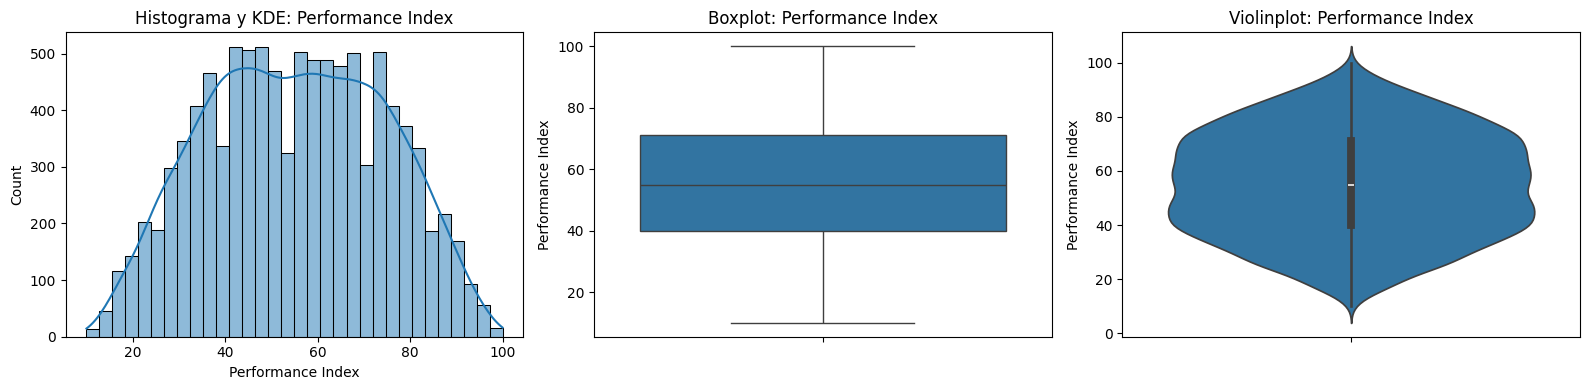


===== Análisis univariado: Extracurricular Activities =====
Frecuencias absolutas:
Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

Frecuencias relativas (%):
Extracurricular Activities
No     50.52
Yes    49.48
Name: proportion, dtype: float64

Cardinalidad (número de categorías): 2


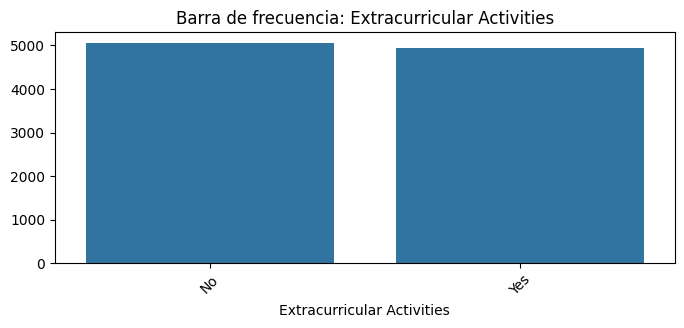

In [ ]:
# --- Análisis univariado para variables numéricas y categóricas ---

# Variables numéricas
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    print(f"\n===== Análisis univariado: {col} =====")
    print("Estadísticos básicos:")
    print(df[col].describe(percentiles=[.1, .25, .5, .75, .9]))
    print(f"Media: {df[col].mean():.3f}")
    print(f"Mediana: {df[col].median():.3f}")
    print(f"Desviación estándar: {df[col].std():.3f}")
    print(f"Asimetría (skew): {df[col].skew():.3f}")
    print(f"Curtosis: {df[col].kurtosis():.3f}")

    fig, axs = plt.subplots(1, 3, figsize=(16, 4))
    sns.histplot(df[col], kde=True, ax=axs[0])
    axs[0].set_title(f"Histograma y KDE: {col}")

    sns.boxplot(y=df[col], ax=axs[1])
    axs[1].set_title(f"Boxplot: {col}")

    sns.violinplot(y=df[col], ax=axs[2])
    axs[2].set_title(f"Violinplot: {col}")

    plt.tight_layout()
    plt.show()

    # Decisiones sugeridas
    if abs(df[col].skew()) > 1:
        print("→ Variable muy sesgada, considerar transformación (log1p, sqrt, Box-Cox si >0).")
    if df[col].nunique() == 1 or df[col].std() < 1e-4:
        print("→ Variable constante o near-zero variance, considerar eliminarla.")

# Variables categóricas
cat_cols = df.select_dtypes(include=["object", "category"]).columns



for col in cat_cols:
    print(f"\n===== Análisis univariado: {col} =====")
    print("Frecuencias absolutas:")
    print(df[col].value_counts())
    print("\nFrecuencias relativas (%):")
    print(df[col].value_counts(normalize=True) * 100)
    print(f"\nCardinalidad (número de categorías): {df[col].nunique()}")

    plt.figure(figsize=(8, 3))
    vc = df[col].value_counts()
    if len(vc) > 30:
        print("→ Cardinalidad alta (>30), considerar agrupar categorías raras como 'Otras'.")
        vc = vc[:29].append(pd.Series(vc[29:].sum(), index=['Otras']))
    sns.barplot(x=vc.index, y=vc.values)
    plt.title(f"Barra de frecuencia: {col}")
    plt.xticks(rotation=45)
    plt.show()


# Referencias

Matplotlib documentation — Matplotlib 3.10.6 documentation. (2025). Matplotlib.org. https://matplotlib.org/stable/index.html
